# Mall Customer Segmentation Clustering Using K-Mean Clustering

## About the Dataset

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis.

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


[Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download)

In [160]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [161]:
customer_df = pd.read_csv('./data/Mall_Customers.csv')

customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [162]:
customer_df.shape

(200, 5)

In [163]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [164]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [165]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [166]:
customer_df.duplicated().sum()

0

In [167]:
def summary_df(df:pd.DataFrame) -> pd.DataFrame:
    """
    Generates a summary of the DataFrame including data types, counts, unique values,
    percentages of unique values, null counts, percentages of null values, and basic 
    statistics for numeric columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.

    Returns:
    pd.DataFrame: Summary DataFrame.
    """
    df_copy = df.copy()
    
    # Initialize an empty DataFrame to store summary information
    desc = pd.DataFrame(index=list(df_copy))

    desc['type'] = df_copy.dtypes
    desc['count'] = df_copy.count()
    desc['nunique'] = df_copy.nunique()
    desc['%unique'] = desc['nunique'] / len(df_copy) * 100
    desc['null'] = df_copy.isnull().sum()
    desc['%null'] = desc['null'] / len(df_copy) * 100
    
    # Concatenate summary statistics for numeric columns
    desc = pd.concat([desc, df_copy.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null'])
    
    return desc

In [168]:
desc_df = summary_df(customer_df)
desc_df.style.background_gradient()

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
CustomerID,int64,200,200,100.000000,0,0.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,int64,200,51,25.500000,0,0.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),int64,200,64,32.000000,0,0.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),int64,200,84,42.000000,0,0.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000
Gender,object,200,2,1.000000,0,0.000000,nan,nan,nan,nan,nan,nan,nan


# Data Exploration

In [169]:
# Convert categorical Gender Column to Numerical
customer_df['Gender'] = customer_df['Gender'].map({'Male': 0, 'Female': 1})

## 01. General All Data Distribution

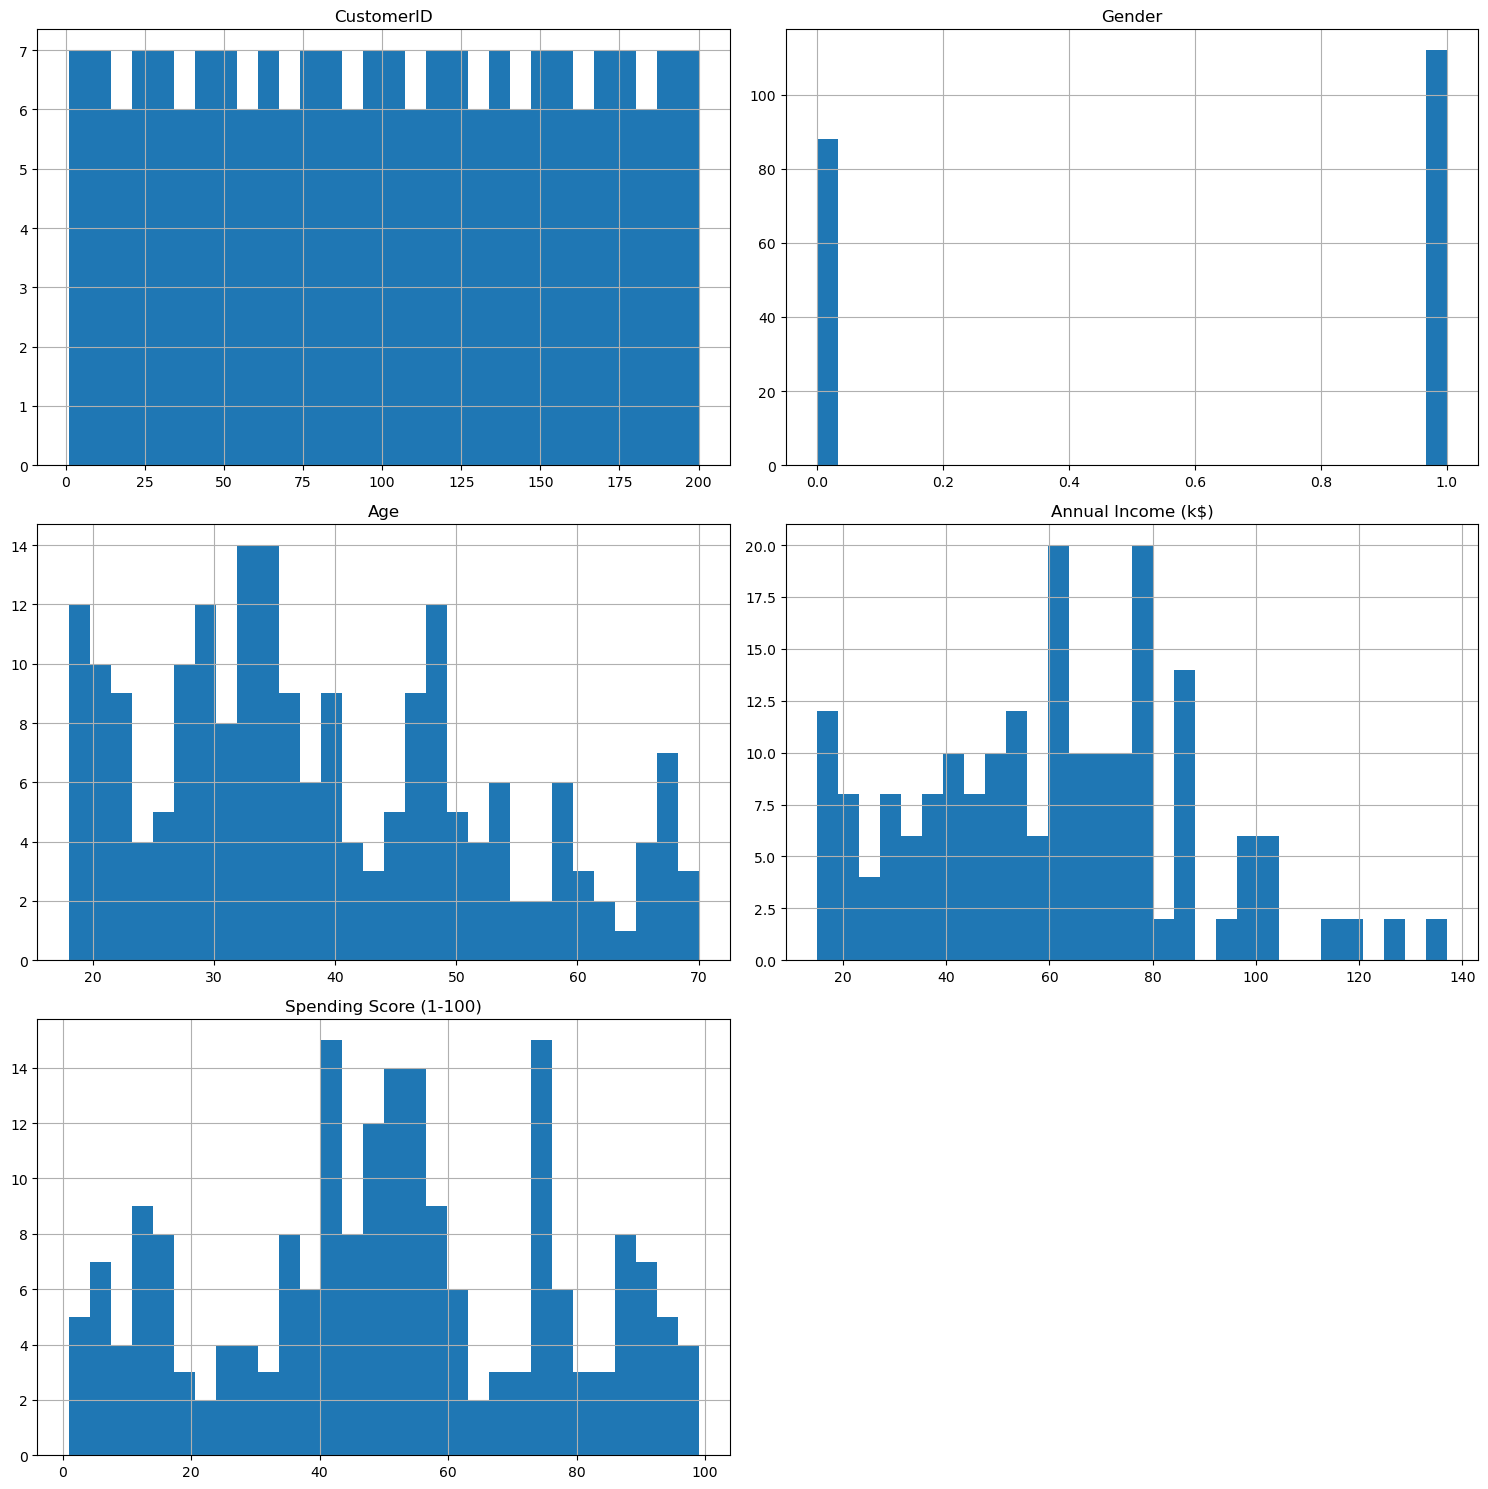

In [170]:
# Quick data distribution overview
customer_df.hist(bins=30, figsize=(15, 15))
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Observations:
* Customer id column can be removed as not required in the clustering process.
* Age, Annual income and spending score is distributed normally.
* Here i will only use annual income and spending score for the clustering the customer.

## Data Preparation

In [171]:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [172]:
# Select features for clustering
# X = customer_df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [173]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Find the Optimum Number of Cluster, k

In [174]:
# Standardize the data (optional but recommended for K-means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [175]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

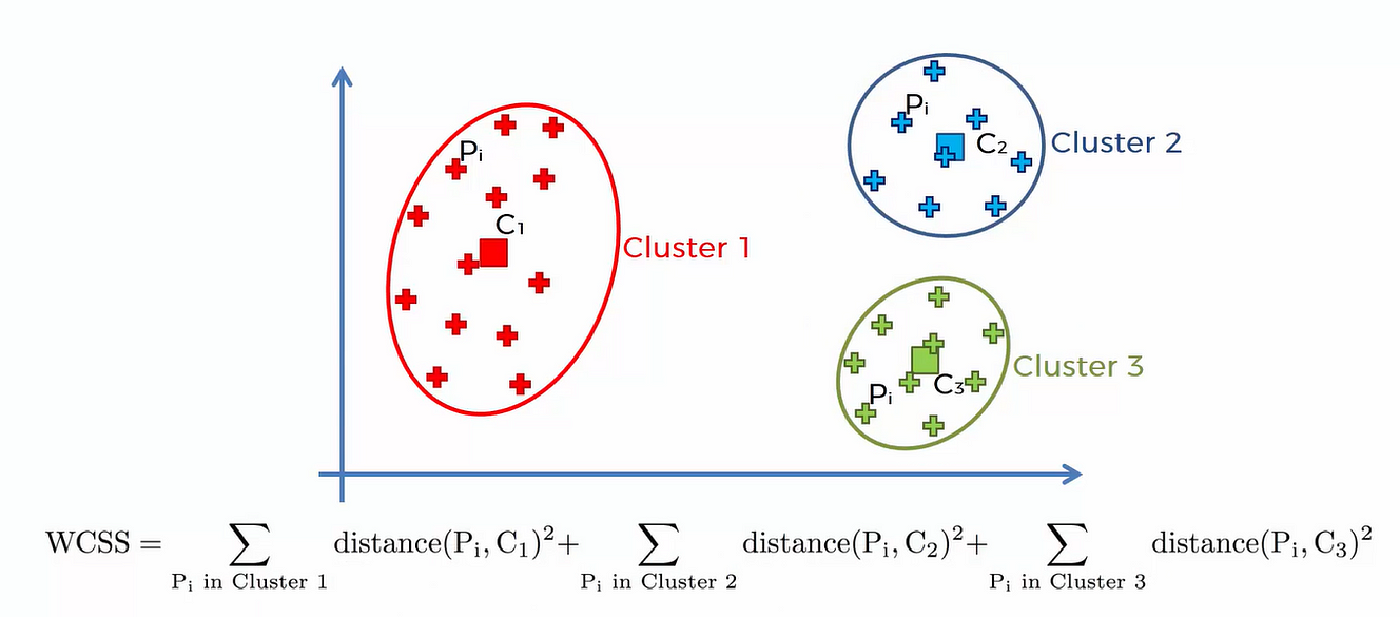

For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease.

In [176]:
# Find the optimal number of clusters using the elbow method, wcss -> within cluster sum of squares
wcss = []

# Loop through different values of 10 cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

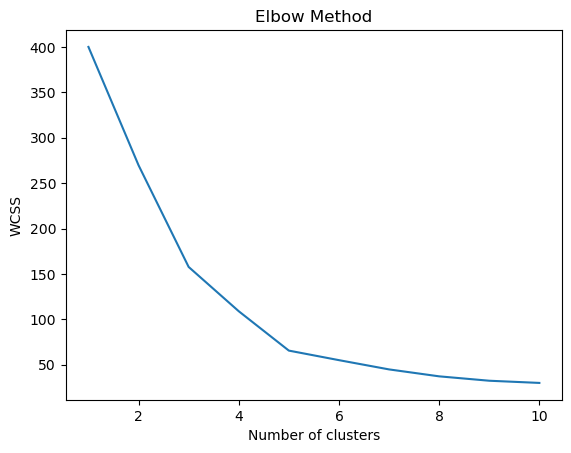

In [177]:
# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Here i can see that the optimum number of cluster = 5

# Clustering Model Training

In [178]:
# Choose the number of clusters based on the elbow plot (let's say 4)
k = 5

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# return a label for each data point based on their cluster
cluster_labels = kmeans.fit_predict(X_scaled)

In [179]:
print(cluster_labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [180]:
# Add cluster labels to the dataframe
customer_df['Cluster'] = cluster_labels

In [181]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,4
2,3,1,20,16,6,3
3,4,1,23,16,77,4
4,5,1,31,17,40,3


# Visualize the Clustering

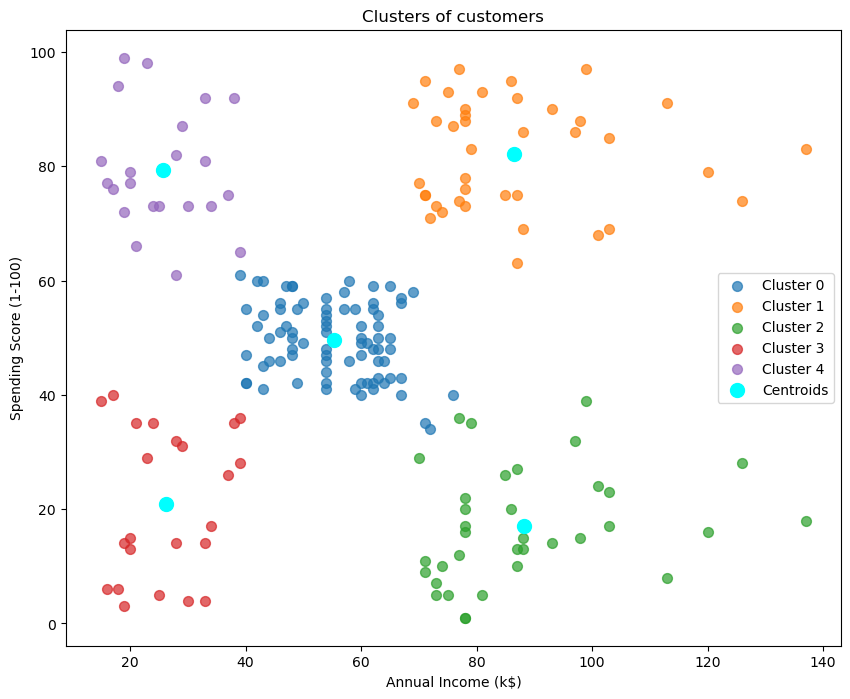

In [182]:
# Visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for i in range(k):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {i}', alpha=0.7, s=50)
    

# Inverse transform centroids to original scale
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot centroids on original scale
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=100, c='cyan', label='Centroids')
    
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Summary

1. Here I just consider 'Annual Income (k$)', 'Spending Score (1-100)' columns only for the clustering.
2. If using all columns for clustering, it might lead to more number of optimum cluster.
3. So finding the important parameter for clustering is crucial subject to project cases.
4. Here we can see that, based on 'Annual Income (k$)', 'Spending Score (1-100)', we can clearly clustering the customer into 5 cluster.